In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn  as sns

import scipy
from scipy import stats

In [2]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [3]:
%matplotlib inline
rcParams['figure.figsize']=13,6

In [5]:
data=pd.read_csv('PWC Hotel and Flight Transactions - 1 Jan 2018 to 21 May 2019.csv')
Designation_data=pd.read_csv('PWC User Designation Data.csv')
Travel_class_data=pd.read_csv('PWC Travel Class Data.csv')

In [6]:
data.report_status.value_counts()

Verified by Finance     15150
Return to update         1008
Saved                     399
Partially Verified        393
Pending for Audit         242
Rejected                  157
Pending for Approval      133
Data Enrichment           122
In-Queue                   48
Name: report_status, dtype: int64

In [7]:
Designation_data['designation']=Designation_data['designation'].apply(lambda x:x[4:len(Designation_data['designation'])])
Designation_data.head()

,user_id,user_name,designation
0,HP2019211141759911243539HP,A Saketh Ram Chandar,Intern/Trainee
1,HP201922357211732922512HP,A Syed Suhail,Specialist
2,HP20192111530578970962088HP,A Vishnu Aryanand,Specialist
3,HP2019211155481479131253HP,AAKASH JAIN,Associate
4,HP20192111515184091443327HP,AARUSHI GOEL,Senior Associate


In [8]:
Travel_class_data.head()

,txn_id,travel_class
0,HPHED2019220641386912455526HP,Economy
1,HPHED2019221132950292192574HP,Economy
2,HED20192181452581922097686HP,Economy
3,HPPCE2019222932373370313148HP,Economy
4,HPPCE20193121952279752744037HP,Economy


In [9]:
Designation_data['designation'].unique()

array(['Intern/Trainee', 'Specialist', 'Associate', 'Senior Associate',
       'Manager', 'Director', 'Administrative', 'Senior Manager',
       'Partner', 'Managing Director', 'Executive Director'], dtype=object)

In [10]:
data=pd.merge(data, Designation_data[['user_id','designation']], on=['user_id'])
data=data[data['designation'].isnull()==False]

data=pd.merge(data, Travel_class_data[['txn_id','travel_class']],how='left', on=['txn_id'])

In [11]:
countries_data=pd.read_csv('Cities.csv')
countries_data.head(2)

,city,country
0,A Coruña,Spain
1,Aachen,Germany


In [12]:

data=pd.merge(data, countries_data,how='left', on=['city'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18217 entries, 0 to 18216
Data columns (total 44 columns):
txn_id                    18217 non-null object
description               2219 non-null object
txn_date                  18217 non-null object
payee_merchant            18216 non-null object
amount                    18217 non-null float64
channel                   0 non-null float64
mcc                       0 non-null float64
merchant_id               0 non-null float64
txn_type_id               18217 non-null int64
user_id                   18217 non-null object
wallet_id                 18217 non-null object
comments                  18217 non-null object
txn_type                  18217 non-null object
is_org                    18217 non-null bool
report_id                 17652 non-null object
report_submission_date    17262 non-null object
report_approved_date      15148 non-null object
expense_category          18217 non-null object
report_status             17652 non-nul

In [14]:
import datetime as dt

data['txn_date']=pd.to_datetime(data['txn_date'])
data['report_submission_date']=pd.to_datetime(data['report_submission_date'])

delta=dt.timedelta(90)
data['last_date_of_submission']=data['txn_date']+delta

In [15]:

data[['policy_id_1','attribute_id_1','msg_1']].groupby(['policy_id_1','attribute_id_1'])['msg_1'].apply(pd.Series.mode).to_frame()

,,,msg_1
policy_id_1,attribute_id_1,,
13563.0,12145.0,0,Please attach only Foreign travel expenses in ...
15862.0,13703.0,0,Not eligible for Room rent per day exceeding 1...
15863.0,13707.0,0,Not eligible for Room rent per day exceeding 7...
15864.0,13708.0,0,Not eligible for Room rent per day exceeding 5...
15865.0,13708.0,0,Not eligible for Room rent per day exceeding 5...
15867.0,13710.0,0,Not eligible for Room rent per day exceeding 4...
15868.0,13709.0,0,Not eligible for Room rent per day exceeding 4...
15869.0,13711.0,0,Not eligible for Room rent per day exceeding 3...
15876.0,13719.0,0,Not eligible for particular class of Air Travel


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
data2=data[['user_id','expense_category','amount','designation','travel_class','txn_type','report_status','txn_date','last_date_of_submission','report_submission_date',
     'policy_id_1','policy_id_2','policy_id_3','policy_id_4','city','city_group','country']]

data2[['policy_id_1','policy_id_2','policy_id_3','policy_id_4']]=data2[['policy_id_1','policy_id_2','policy_id_3','policy_id_4']].astype('str')


data2.head()

,user_id,expense_category,amount,designation,travel_class,txn_type,report_status,txn_date,last_date_of_submission,report_submission_date,policy_id_1,policy_id_2,policy_id_3,policy_id_4,city,city_group,country
0,HP2019211104039332593324HP,Airfare Expense,21719.0,Partner,Economy,HDFC Expense Dr,Data Enrichment,2019-05-16,2019-08-14,2019-05-21,nan,nan,nan,nan,Gurgaon,Metro,India
1,HP2019211104039332593324HP,Airfare Expense,6467.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-11-02,2020-01-31,2019-02-25,nan,nan,nan,nan,Gurgaon,Metro,India
2,HP2019211104039332593324HP,Airfare Expense,4170.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-02-13,2019-05-14,2019-02-25,nan,nan,nan,nan,Gurgaon,Metro,India
3,HP2019211104039332593324HP,Airfare Expense,6968.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-02-13,2019-05-14,2019-02-25,nan,nan,nan,nan,Gurgaon,Metro,India
4,HP2019211104039332593324HP,Airfare Expense,4170.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-11-02,2020-01-31,2019-02-25,nan,nan,nan,nan,Gurgaon,Metro,India


In [18]:
print (data2[['expense_category','amount','report_status']].sort_values('amount',ascending=False).head())
data2.drop([15127],axis=0,inplace=True)

            expense_category       amount        report_status
15127        Airfare Expense  13456765.00                Saved
17113  Hotel Booking Expense    560000.00  Verified by Finance
3842   Hotel Booking Expense    533588.00  Verified by Finance
4928         Airfare Expense    478480.19  Verified by Finance
3705         Airfare Expense    413691.00  Verified by Finance


In [19]:
data_pol=data2[data2['policy_id_1']!='nan']
data_pol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 25 to 18216
Data columns (total 17 columns):
user_id                    1530 non-null object
expense_category           1530 non-null object
amount                     1530 non-null float64
designation                1530 non-null object
travel_class               339 non-null object
txn_type                   1530 non-null object
report_status              1530 non-null object
txn_date                   1530 non-null datetime64[ns]
last_date_of_submission    1530 non-null datetime64[ns]
report_submission_date     1320 non-null datetime64[ns]
policy_id_1                1530 non-null object
policy_id_2                1530 non-null object
policy_id_3                1530 non-null object
policy_id_4                1530 non-null object
city                       1528 non-null object
city_group                 1528 non-null object
country                    1528 non-null object
dtypes: datetime64[ns](3), float64(1), object(13)
m

In [20]:
data_pol.isnull().sum()

user_id                       0
expense_category              0
amount                        0
designation                   0
travel_class               1191
txn_type                      0
report_status                 0
txn_date                      0
last_date_of_submission       0
report_submission_date      210
policy_id_1                   0
policy_id_2                   0
policy_id_3                   0
policy_id_4                   0
city                          2
city_group                    2
country                       2
dtype: int64

In [21]:
data_pol[data_pol['city'].isnull()==True ]

,user_id,expense_category,amount,designation,travel_class,txn_type,report_status,txn_date,last_date_of_submission,report_submission_date,policy_id_1,policy_id_2,policy_id_3,policy_id_4,city,city_group,country
3087,HP2019211111521504979719HP,Airfare Expense,5137.0,Manager,Economy,HDFC Expense Dr,Saved,2018-03-12,2018-06-10,NaT,15922.0,16882.0,nan,nan,NaN,NaN,NaN
15120,HP201882492014573715291HP,Airfare Expense,2.0,Partner,NaN,HDFC Expense Dr,Saved,2019-12-03,2020-03-02,NaT,15922.0,nan,nan,nan,NaN,NaN,NaN


In [22]:
data.loc[[3087,15120]][['city_group','city','payee_merchant']]

,city_group,city,payee_merchant
3087,NaN,NaN,YATRA ONLINE PVT LTD GURGAON IND
15120,NaN,NaN,TEST MOHIT EXPENSE


In [23]:
data_pol.loc[3087,['city','city_group','country']]=["Gurgaon","Metro",'India']

In [24]:
data_pol[data_pol['city'].isnull()==True ]

,user_id,expense_category,amount,designation,travel_class,txn_type,report_status,txn_date,last_date_of_submission,report_submission_date,policy_id_1,policy_id_2,policy_id_3,policy_id_4,city,city_group,country
15120,HP201882492014573715291HP,Airfare Expense,2.0,Partner,NaN,HDFC Expense Dr,Saved,2019-12-03,2020-03-02,NaT,15922.0,nan,nan,nan,NaN,NaN,NaN


In [25]:
data.nunique()

txn_id                     18217
description                 2054
txn_date                     343
payee_merchant              7687
amount                     10259
channel                        0
mcc                            0
merchant_id                    0
txn_type_id                    5
user_id                     3350
wallet_id                   3350
comments                       1
txn_type                       5
is_org                         1
report_id                   8744
report_submission_date        96
report_approved_date          80
expense_category               2
report_status                  9
city                         519
city_group                     2
policy_id_1                   17
policy_id_2                    8
policy_id_3                    3
policy_id_4                    1
attribute_id_1                16
attribute_id_2                 8
attribute_id_3                 3
attribute_id_4                 1
msg_1                         16
msg_2     

# EDA

Text(0.5, 1.0, 'Policy violation Expense category')

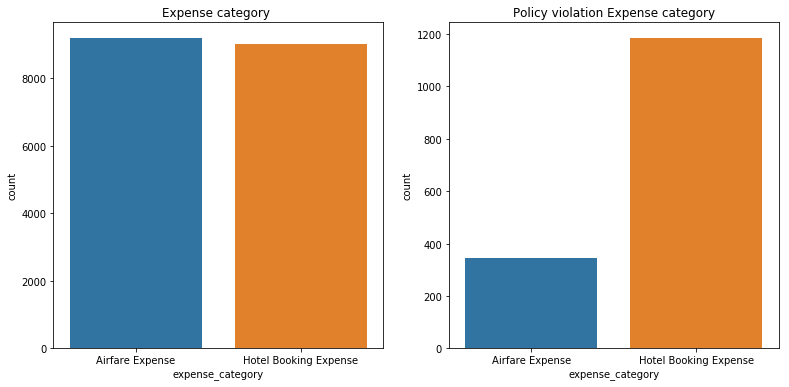

In [26]:
plt.subplot(1,2,1)
sns.countplot(data['expense_category'],order=['Airfare Expense','Hotel Booking Expense'])
plt.title('Expense category ')

plt.subplot(1,2,2)
sns.countplot(data_pol['expense_category'],order=['Airfare Expense','Hotel Booking Expense'])
plt.title('Policy violation Expense category')

In [27]:
# most policy voilated user in both expenses
k=data_pol['user_id'].value_counts().head(7)
k

HP20192111339325262603159HP    42
HP20192111232233002644428HP    35
HP20192111057189483552403HP    27
HP201921112254174175289HP      22
HP2019211111888410094398HP     21
HP2019211121545472651096HP     21
HP20192111232248656162932HP    19
Name: user_id, dtype: int64

In [28]:
df_piv=data2[['user_id','expense_category','city_group','txn_type','report_status','policy_id_1']].groupby(['user_id','expense_category','city_group','txn_type','report_status'])['policy_id_1'].value_counts().to_frame()
df_piv.loc[k.index].head(10)

policy_id_1
user_id                     expense_category      city_group txn_type      report_status        policy_id_1             
HP20192111057189483552403HP Airfare Expense       Metro      Cash          Verified by Finance  nan                   11
                                                             Personal Card Saved                16882.0               11
                                                                                                15940.0                1
                                                                           Verified by Finance  nan                   15
                            Hotel Booking Expense Metro      Cash          Pending for Approval 15868.0                1
                                                                           Verified by Finance  15868.0                1
                                                             Personal Card Pending for Approval 15868.0                2
                                                                           Pending for Audit    15868.0                2
                                                                           Rejected             15868.0                1
                                                                           Return to update     15868.0                3

In [29]:
#Separating data in Airfare and Hotel Expenses

data_airfare = data2[data2['expense_category']=='Airfare Expense'].copy()
data_hotel = data2[data2['expense_category']=='Hotel Booking Expense'].copy()

data_pol_airfare = data_pol[data_pol['expense_category']=='Airfare Expense'].copy()
data_pol_hotel = data_pol[data_pol['expense_category']=='Hotel Booking Expense'].copy()

# Airfare Expenses

In [30]:
data_airfare.describe().astype('int64')

,amount
count,9194
mean,9852
std,18904
min,0
25%,4556
50%,6966
75%,9578
max,478480


Text(0.5, 1.0, 'boxplot')

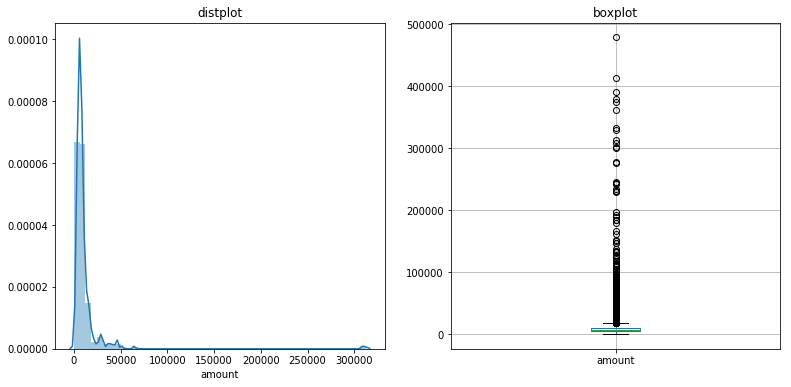

In [31]:

plt.subplot(1,2,1)
sns.distplot(data_pol_airfare['amount'])
plt.title('distplot')

plt.subplot(1,2,2)
data_airfare.boxplot('amount')
plt.title('boxplot')

In [32]:
#policy count in airfare data
data_pol_airfare['policy_id_1'].value_counts().head(10)

16882.0    207
16546.0     75
15876.0     37
15940.0     18
15924.0      3
15922.0      2
16547.0      1
15913.0      1
Name: policy_id_1, dtype: int64

In Case of AirExpenses most of user voilating same policy 16882('Your expense is older than 90 days and has been prohibited from submission') ,16546 ('Expense Date should be between Project Start Date and Project Completion Date') and 15876('Not eligible for particular class of Air Travel')

In [33]:
# most policy voilated users in airfare data
k=data_pol_airfare['user_id'].value_counts().head(6)
k

HP20192111339325262603159HP    42
HP2019211111888410094398HP     21
HP20192111129207894625120HP    13
HP201882492014573715291HP      12
HP20192111057189483552403HP    12
HP20192111033565604867486HP    11
Name: user_id, dtype: int64

In [34]:
df_piv=data_pol_airfare[['user_id','expense_category','city_group','report_status','policy_id_1']].groupby(['user_id','expense_category','city_group','report_status'])['policy_id_1'].value_counts().to_frame()
df_piv.loc[k.index]

policy_id_1
user_id                     expense_category city_group report_status        policy_id_1             
HP201882492014573715291HP   Airfare Expense  Metro      Saved                16546.0                8
                                             Non-Metro  Saved                16546.0                3
HP20192111033565604867486HP Airfare Expense  Metro      Pending for Approval 16882.0                6
                                                        Return to update     16882.0                4
                                                        Saved                16882.0                1
HP20192111057189483552403HP Airfare Expense  Metro      Saved                16882.0               11
                                                                             15940.0                1
HP2019211111888410094398HP  Airfare Expense  Metro      Saved                16882.0               19
                                                                             15940.0                2
HP20192111129207894625120HP Airfare Expense  Metro      Saved                16882.0               13
HP20192111339325262603159HP Airfare Expense  Metro      Saved                15876.0                1
                                                        Verified by Finance  16882.0               41

In [35]:
data_pol_airfare.pivot_table(['user_id'],
               ['city_group','report_status'], aggfunc={'user_id':len})


user_id
city_group report_status                
Metro      Partially Verified          1
           Pending for Approval        6
           Rejected                    4
           Return to update           25
           Saved                     174
           Verified by Finance       104
Non-Metro  Return to update            5
           Saved                      14
           Verified by Finance        10

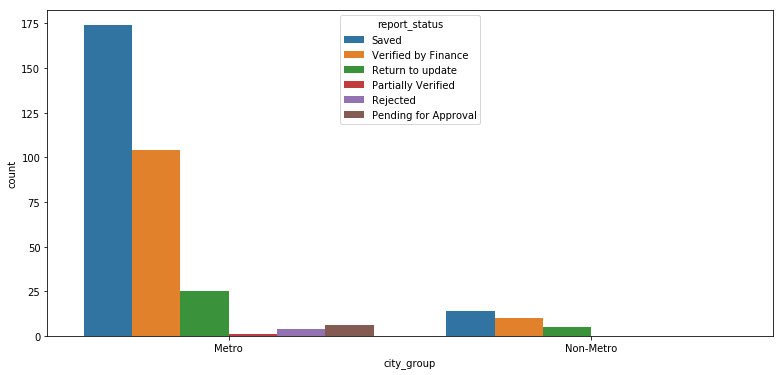

In [36]:
sns.countplot('city_group',hue='report_status',data=data_pol_airfare)

Partially verified, Rejected,Pending For Approval and comparatively high saved requests available only in Metro citys

# Hotel Expenses

In [37]:
data_hotel.describe().astype('int64')

,amount
count,9022
mean,17740
std,28224
min,0
25%,4433
50%,9062
75%,19200
max,560000


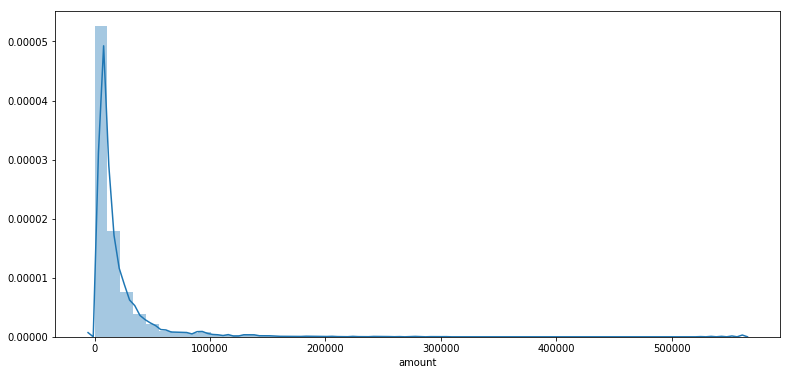

In [38]:
sns.distplot(data_hotel['amount'])

Right Skiwed data,need more variables to Explore.

In [39]:
#policy count in Hotel expenses data
data_pol_hotel['policy_id_1'].value_counts().head(10)

15868.0    467
15869.0    318
15865.0    147
15867.0     74
15862.0     73
15863.0     39
16882.0     28
15864.0     21
15940.0      9
16546.0      4
Name: policy_id_1, dtype: int64

15868 ("Not eligible for Room rent per day exceeding 4,500 INR"),15869('Not eligible for Room rent per day exceeding 3,000 INR'), 15865("Not eligible for Room rent per day exceeding 5,000 INR")

In [40]:
# most policy voilated users in airfare data
k=data_pol_hotel['user_id'].value_counts().head(8)
k

HP20192111232233002644428HP    35
HP2019211121545472651096HP     20
HP20192111232248656162932HP    19
HP201921112254174175289HP      18
HP20192111035384850954433HP    15
HP20192111057189483552403HP    15
HP20192111425304458322644HP    14
HP20192111359484209962883HP    14
Name: user_id, dtype: int64

In [41]:
data_pol_hotel.pivot_table(['user_id'],
               ['city_group','report_status'], aggfunc={'user_id':len})

user_id
city_group report_status                
Metro      Data Enrichment             7
           In-Queue                    2
           Partially Verified         10
           Pending for Approval       38
           Pending for Audit          18
           Rejected                   19
           Return to update           40
           Saved                      14
           Verified by Finance       626
Non-Metro  Data Enrichment             1
           Partially Verified         12
           Pending for Approval       27
           Pending for Audit          16
           Rejected                    9
           Return to update           25
           Saved                       9
           Verified by Finance       313

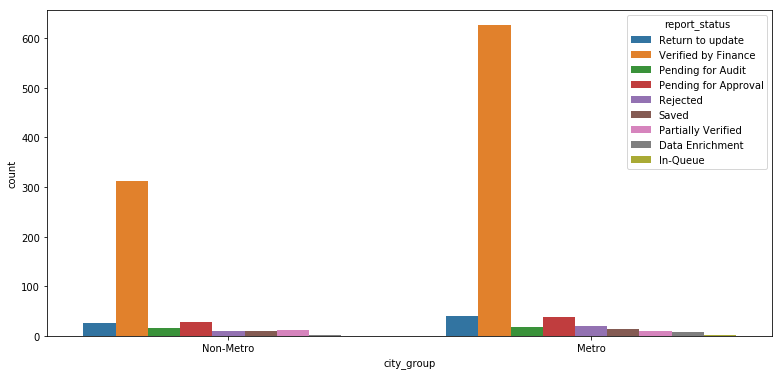

In [42]:
sns.countplot('city_group',hue='report_status',data=data_pol_hotel)

In [43]:
data_pol.pivot_table(['report_status','user_id'],
               ['policy_id_1','policy_id_2','policy_id_3','policy_id_4','expense_category','city_group'], aggfunc={'report_status':'unique','user_id':len}).head(10)

report_status  \
policy_id_1 policy_id_2 policy_id_3 policy_id_4 expense_category      city_group                                                      
13563.0     nan         nan         nan         Hotel Booking Expense Metro                                   [Verified by Finance]   
                                                                      Non-Metro                               [Verified by Finance]   
15862.0     nan         nan         nan         Hotel Booking Expense Metro       [Verified by Finance, Return to update, Reject...   
                                                                      Non-Metro                               [Verified by Finance]   
15863.0     nan         nan         nan         Hotel Booking Expense Metro       [Verified by Finance, Pending for Approval, Re...   
15864.0     nan         nan         nan         Hotel Booking Expense Metro                                   [Verified by Finance]   
                                                                      Non-Metro                               [Verified by Finance]   
15865.0     16882.0     nan         nan         Hotel Booking Expense Metro                                                 [Saved]   
            nan         nan         nan         Hotel Booking Expense Metro       [Verified by Finance, Partially Verified, Pend...   
15867.0     nan         nan         nan         Hotel Booking Expense Metro               [Partially Verified, Verified by Finance]   

                                                                                  user_id  
policy_id_1 policy_id_2 policy_id_3 policy_id_4 expense_category      city_group           
13563.0     nan         nan         nan         Hotel Booking Expense Metro             1  
                                                                      Non-Metro         1  
15862.0     nan         nan         nan         Hotel Booking Expense Metro            68  
                                                                      Non-Metro         5  
15863.0     nan         nan         nan         Hotel Booking Expense Metro            39  
15864.0     nan         nan         nan         Hotel Booking Expense Metro             2  
                                                                      Non-Metro        19  
15865.0     16882.0     nan         nan         Hotel Booking Expense Metro             1  
            nan         nan         nan         Hotel Booking Expense Metro           146  
15867.0     nan         nan         nan         Hotel Booking Expense Metro             2

# Creating new variables

In [44]:
print(data2['expense_category'].value_counts())
print(data_pol['expense_category'].value_counts())

Airfare Expense          9194
Hotel Booking Expense    9022
Name: expense_category, dtype: int64
Hotel Booking Expense    1186
Airfare Expense           344
Name: expense_category, dtype: int64


In [45]:
freq_dict = {
    'Airfare Expense': 344/9195,
    'Hotel Booking Expense': 1186/9022
}
data2['category_pol_freq'] = data2['expense_category'].map(freq_dict)

In [46]:
piv=data2[['user_id','expense_category','amount']].groupby(['user_id','expense_category']).mean()
piv.columns=['cat_user_mean_amount']
piv.head(6)

cat_user_mean_amount
user_id                     expense_category                           
HP201882492014573715291HP   Airfare Expense                  337.680000
                            Hotel Booking Expense           6416.500000
HP2019211101935742786143HP  Airfare Expense                15829.485714
                            Hotel Booking Expense          22067.356667
HP20192111019367426022378HP Airfare Expense                28919.647059
                            Hotel Booking Expense          16525.746667

In [47]:
data2=pd.merge(data2, piv, on=['user_id','expense_category'])

In [48]:
data2['Cat_user_Deviation']=data2['amount']-data2['cat_user_mean_amount']
#data2['Cat_user_Deviation'][data2['Cat_user_Deviation'] < 0] = 0

In [49]:
data2.head()

,user_id,expense_category,amount,designation,travel_class,txn_type,report_status,txn_date,last_date_of_submission,report_submission_date,policy_id_1,policy_id_2,policy_id_3,policy_id_4,city,city_group,country,category_pol_freq,cat_user_mean_amount,Cat_user_Deviation
0,HP2019211104039332593324HP,Airfare Expense,21719.0,Partner,Economy,HDFC Expense Dr,Data Enrichment,2019-05-16,2019-08-14,2019-05-21,nan,nan,nan,nan,Gurgaon,Metro,India,0.037412,8698.8,13020.2
1,HP2019211104039332593324HP,Airfare Expense,6467.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-11-02,2020-01-31,2019-02-25,nan,nan,nan,nan,Gurgaon,Metro,India,0.037412,8698.8,-2231.8
2,HP2019211104039332593324HP,Airfare Expense,4170.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-02-13,2019-05-14,2019-02-25,nan,nan,nan,nan,Gurgaon,Metro,India,0.037412,8698.8,-4528.8
3,HP2019211104039332593324HP,Airfare Expense,6968.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-02-13,2019-05-14,2019-02-25,nan,nan,nan,nan,Gurgaon,Metro,India,0.037412,8698.8,-1730.8
4,HP2019211104039332593324HP,Airfare Expense,4170.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-11-02,2020-01-31,2019-02-25,nan,nan,nan,nan,Gurgaon,Metro,India,0.037412,8698.8,-4528.8


# Policy

In [50]:
piv1=data2[data2['report_status']=='Verified by Finance'].pivot_table(['user_id'],
               ['policy_id_1','policy_id_2','policy_id_3','policy_id_4','report_status'], aggfunc={'user_id':len})
piv1.columns=['veri_count']
piv1.head()

,,,,,veri_count
policy_id_1,policy_id_2,policy_id_3,policy_id_4,report_status,
13563.0,nan,nan,nan,Verified by Finance,2
15862.0,nan,nan,nan,Verified by Finance,67
15863.0,nan,nan,nan,Verified by Finance,36
15864.0,nan,nan,nan,Verified by Finance,21
15865.0,nan,nan,nan,Verified by Finance,126


In [51]:
piv2=data2.pivot_table(['user_id'],
               ['policy_id_1','policy_id_2','policy_id_3','policy_id_4'], aggfunc={'user_id':len})
piv2.columns=['users_count']
piv2.head()

,,,,users_count
policy_id_1,policy_id_2,policy_id_3,policy_id_4,
13563.0,nan,nan,nan,2
15862.0,nan,nan,nan,73
15863.0,nan,nan,nan,39
15864.0,nan,nan,nan,21
15865.0,16882.0,nan,nan,1


In [52]:
data3=data2.copy()

In [53]:
data3=pd.merge(data3, piv1,'left', on=['policy_id_1','policy_id_2','policy_id_3','policy_id_4'])
data3=pd.merge(data3, piv2,'left', on=['policy_id_1','policy_id_2','policy_id_3','policy_id_4'])

In [54]:
data3['veri_count'].fillna(0,inplace=True)

In [55]:
print ((data_pol[data_pol['report_status']=='Verified by Finance']['report_status'].shape[0])/(data_pol['report_status'].shape[0]))
print ((data2[data2['policy_id_1']=='nan'][data['report_status']=='Verified by Finance']['report_status'].shape[0])/(data2[data2['policy_id_1']=='nan']['report_status'].shape[0]))

0.6882352941176471
0.844360541771545


In [56]:
data3['freq_veri_poli']=data3['veri_count']/data3['users_count']
data3.drop(['veri_count','users_count'],axis=1,inplace=True)

In [57]:
data3.freq_veri_poli.unique()

array([0.84483999, 0.72380952, 0.36842105, 0.91780822, 0.79139785,
       0.39914163, 0.        , 0.8630137 , 0.74285714, 0.89189189,
       1.        , 0.85714286, 0.92307692])

In [58]:
data2['freq_veri_poli']=data3['freq_veri_poli']

# User freq of policy voilation

In [59]:
t1=data2[data2['policy_id_1']!='nan']['user_id'].value_counts().to_frame()
t1.columns=['policy_voilations']

t2=data2[data2['policy_id_2']!='nan']['user_id'].value_counts().to_frame()
t2.columns=['policy_voilations']

t3=data2[data2['policy_id_3']!='nan']['user_id'].value_counts().to_frame()
t3.columns=['policy_voilations']

t4=data2[data2['policy_id_4']!='nan']['user_id'].value_counts().to_frame()
t4.columns=['policy_voilations']

In [60]:
t=t1+t2.reindex_like(t1).fillna(0)+t3.reindex_like(t1).fillna(0)+t4.reindex_like(t1).fillna(0)
t.index.names = ['user_id']
print(t.head())
print(t['policy_voilations'].sum())
print(t.index.nunique())

                             policy_voilations
user_id                                       
HP20192111339325262603159HP               43.0
HP20192111232233002644428HP               35.0
HP20192111057189483552403HP               28.0
HP201921112254174175289HP                 23.0
HP2019211111888410094398HP                23.0
1656.0
664


In [61]:
data2=pd.merge(data2, t,how='left', on=['user_id'])
data2['policy_voilations'][data2['policy_voilations'].isnull()==True]=0

In [62]:
data2['freq_pol_voil']=data2['policy_voilations']/t['policy_voilations'].sum()
data2['freq_pol_voil'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: freq_pol_voil, dtype: float64

In [63]:
scaler=preprocessing.MinMaxScaler(feature_range=(0, 100))
dev=data2[['Cat_Deviation','Cat_user_Deviation','freq_pol_voil']]
data2[['Cat_Deviation','Cat_user_Deviation','freq_pol_voil']]=scaler.fit_transform(dev)

data2['freq_pol_voil'].unique()

KeyError: "['Cat_Deviation'] not in index"

# txn_type

[Text(0, 0, 'HDFC Expense Dr'),
 Text(0, 0, 'Personal Card'),
 Text(0, 0, 'Cash'),
 Text(0, 0, 'HDFC Expense Cr'),
 Text(0, 0, 'Company Advance')]

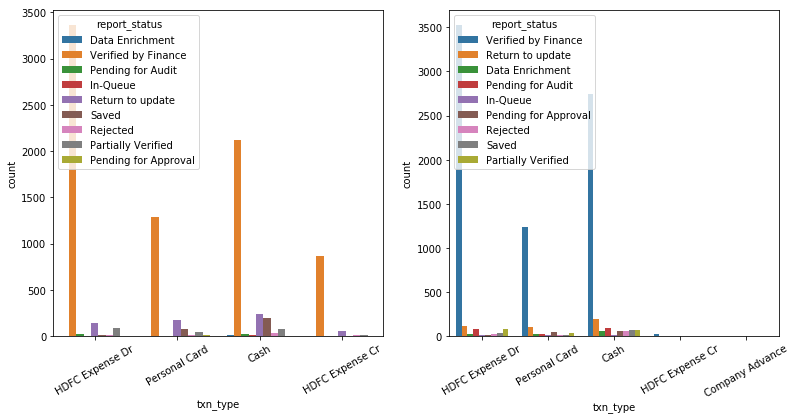

In [64]:
plt.subplot(1,2,1)
p=sns.countplot('txn_type',hue='report_status',data=data2[data2['expense_category']=='Airfare Expense'])
p.set_xticklabels(data2.txn_type.unique(),rotation=30)
plt.subplot(1,2,2)
p=sns.countplot('txn_type',hue='report_status',data=data2[data2['expense_category']!='Airfare Expense'])
p.set_xticklabels(data2.txn_type.unique(),rotation=30)

More chance to get rejected or saved in payment by cash and personal card

In [65]:
piv3=data2[data2['report_status']=='Verified by Finance'].pivot_table(['user_id'],
               ['txn_type','report_status'], aggfunc={'user_id':len})
piv3.columns=['veri_count']
piv4=data2.pivot_table(['user_id'],
               ['txn_type'], aggfunc={'user_id':len})
piv4.columns=['total_count']

In [66]:
piv3

,,veri_count
txn_type,report_status,
Cash,Verified by Finance,4859
Company Advance,Verified by Finance,3
HDFC Expense Cr,Verified by Finance,886
HDFC Expense Dr,Verified by Finance,6882
Personal Card,Verified by Finance,2520


In [67]:
data2=pd.merge(data2, piv3,'left', on=['txn_type'])
data2=pd.merge(data2, piv4,'left', on=['txn_type'])

In [68]:
data2['txn_veri_freq']=data2['veri_count']/data2['total_count']

data2.drop(['veri_count','total_count'],axis=1,inplace=True)
data2.head()

,user_id,expense_category,amount,designation,travel_class,txn_type,report_status,txn_date,last_date_of_submission,report_submission_date,...,city,city_group,country,category_pol_freq,cat_user_mean_amount,Cat_user_Deviation,freq_veri_poli,policy_voilations,freq_pol_voil,txn_veri_freq
0,HP2019211104039332593324HP,Airfare Expense,21719.0,Partner,Economy,HDFC Expense Dr,Data Enrichment,2019-05-16,2019-08-14,2019-05-21,...,Gurgaon,Metro,India,0.037412,8698.8,13020.2,0.84484,0.0,0.0,0.893998
1,HP2019211104039332593324HP,Airfare Expense,6467.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-11-02,2020-01-31,2019-02-25,...,Gurgaon,Metro,India,0.037412,8698.8,-2231.8,0.84484,0.0,0.0,0.893998
2,HP2019211104039332593324HP,Airfare Expense,4170.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-02-13,2019-05-14,2019-02-25,...,Gurgaon,Metro,India,0.037412,8698.8,-4528.8,0.84484,0.0,0.0,0.893998
3,HP2019211104039332593324HP,Airfare Expense,6968.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-02-13,2019-05-14,2019-02-25,...,Gurgaon,Metro,India,0.037412,8698.8,-1730.8,0.84484,0.0,0.0,0.893998
4,HP2019211104039332593324HP,Airfare Expense,4170.0,Partner,Economy,HDFC Expense Dr,Verified by Finance,2019-11-02,2020-01-31,2019-02-25,...,Gurgaon,Metro,India,0.037412,8698.8,-4528.8,0.84484,0.0,0.0,0.893998


In [69]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18216 entries, 0 to 18215
Data columns (total 24 columns):
user_id                    18216 non-null object
expense_category           18216 non-null object
amount                     18216 non-null float64
designation                18216 non-null object
travel_class               9170 non-null object
txn_type                   18216 non-null object
report_status              17651 non-null object
txn_date                   18216 non-null datetime64[ns]
last_date_of_submission    18216 non-null datetime64[ns]
report_submission_date     17262 non-null datetime64[ns]
policy_id_1                18216 non-null object
policy_id_2                18216 non-null object
policy_id_3                18216 non-null object
policy_id_4                18216 non-null object
city                       18167 non-null object
city_group                 18167 non-null object
country                    18167 non-null object
category_pol_freq          18216 n

# Designation

[Text(0, 0, 'Partner'),
 Text(0, 0, 'Administrative'),
 Text(0, 0, 'Senior Associate'),
 Text(0, 0, 'Manager'),
 Text(0, 0, 'Director'),
 Text(0, 0, 'Senior Manager'),
 Text(0, 0, 'Intern/Trainee'),
 Text(0, 0, 'Associate'),
 Text(0, 0, 'Specialist'),
 Text(0, 0, 'Executive Director'),
 Text(0, 0, 'Managing Director')]

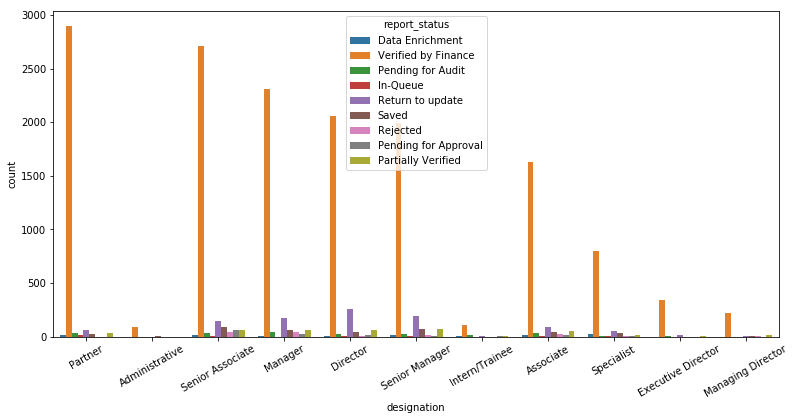

In [70]:
p=sns.countplot('designation',hue='report_status',data=data2)
p.set_xticklabels(data2.designation.unique(),rotation=30)

In [71]:
data2.pivot_table(['user_id'],
               ['designation','expense_category','report_status'], aggfunc={'user_id':len}).head(7)

user_id
designation    expense_category      report_status               
Administrative Airfare Expense       In-Queue                   1
                                     Pending for Audit          2
                                     Saved                      2
                                     Verified by Finance       88
               Hotel Booking Expense Rejected                   1
                                     Saved                      1
                                     Verified by Finance        5

In [72]:
data2['designation'].value_counts()

Senior Associate      3294
Partner               3132
Manager               2841
Director              2575
Senior Manager        2465
Associate             2013
Specialist             996
Executive Director     371
Managing Director      264
Intern/Trainee         161
Administrative         104
Name: designation, dtype: int64

In [73]:
#[data2['amount']>2500][data2['amount']<25000]
designation_air=data2[data2['expense_category']=='Airfare Expense'][['designation','amount']].groupby(['designation']).mean().sort_values('amount')
designation_air

,amount
designation,
Intern/Trainee,5322.853846
Administrative,5953.326316
Specialist,6856.987225
Executive Director,6937.189213
Associate,8178.042497
Senior Manager,8329.537286
Senior Associate,8802.058720
Manager,10070.012697
Director,10765.314691


In [74]:
#[data2['amount']>5000][data2['amount']<10000]
designation_hotel=data2[data2['expense_category']!='Airfare Expense'][['designation','amount']].groupby(['designation']).mean().sort_values('amount')
designation_hotel

,amount
designation,
Specialist,6639.874122
Intern/Trainee,8666.755505
Managing Director,15521.245088
Director,16613.259775
Associate,17311.152604
Executive Director,17512.954456
Senior Manager,18235.665183
Partner,19470.819064
Senior Associate,20193.306999


Text(0.5, 1.0, 'designation_hotel')

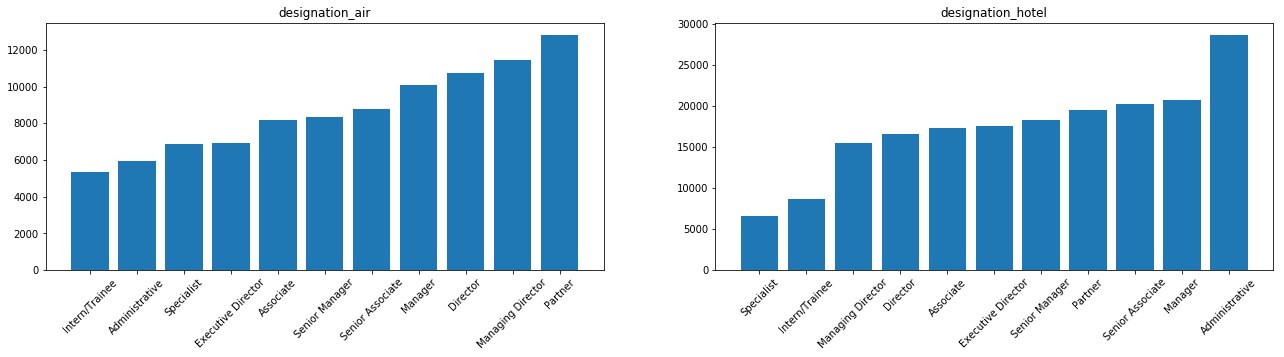

In [75]:
rcParams['figure.figsize']=22,10

plt.subplot(2,2,1)
plt.bar(designation_air.index,designation_air['amount'])
plt.xticks( rotation=45)
plt.title('designation_air')

plt.subplot(2,2,2)
plt.bar(designation_hotel.index,designation_hotel['amount'])
plt.xticks( rotation=45)
plt.title('designation_hotel')

Text(0.5, 1.0, 'HOTEL Expense distribution plot of Matrix Manager VS Expense User')

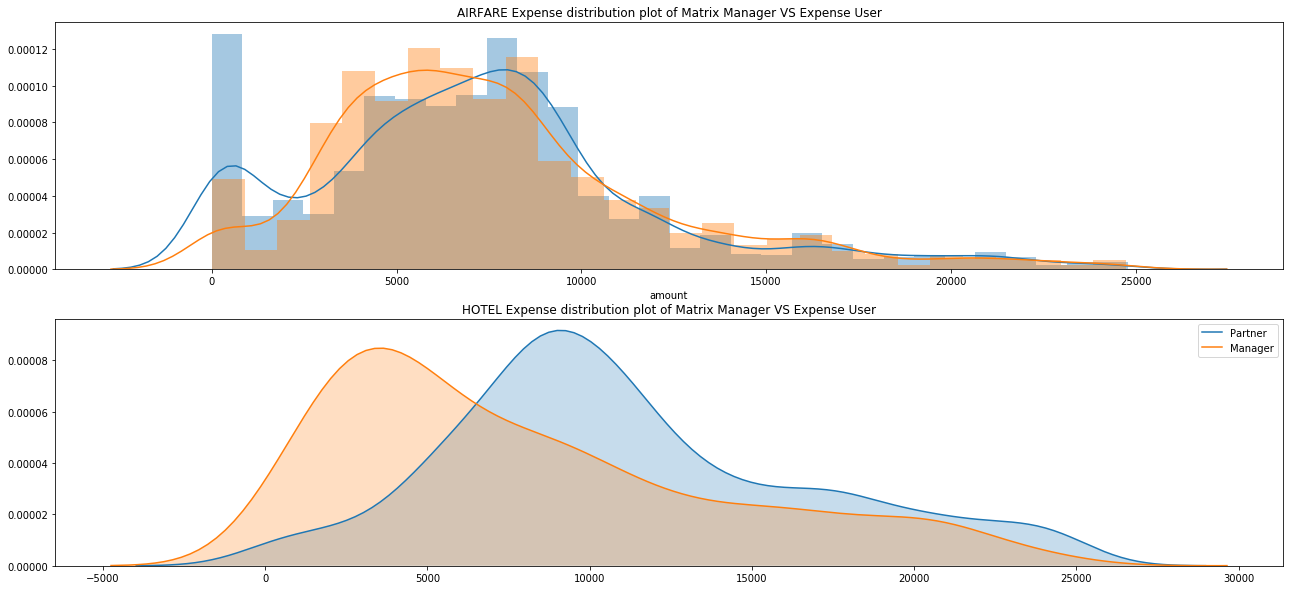

In [76]:

plt.subplot(2,1,1)
sns.distplot(data2[data2['expense_category']=='Airfare Expense'][data2['designation']=='Partner'][data2['amount']<25000]['amount'],label='Partner')
sns.distplot(data2[data2['expense_category']=='Airfare Expense'][data2['designation']=='Manager'][data2['amount']<25000]['amount'],label='Manager')

plt.title('AIRFARE Expense distribution plot of Matrix Manager VS Expense User')

plt.subplot(2,1,2)
sns.kdeplot(data2[data2['expense_category']!='Airfare Expense'][data2['designation']=='Partner'][data2['amount']<25000]['amount'],label='Partner',shade=True)
sns.kdeplot(data2[data2['expense_category']!='Airfare Expense'][data2['designation']=='Manager'][data2['amount']<25000]['amount'],label='Manager',shade=True)

plt.title('HOTEL Expense distribution plot of Matrix Manager VS Expense User')

In [77]:
# It is not possible to book a flight or hotel below Rs.1500 So,Removing the rows with amount less then 1500.

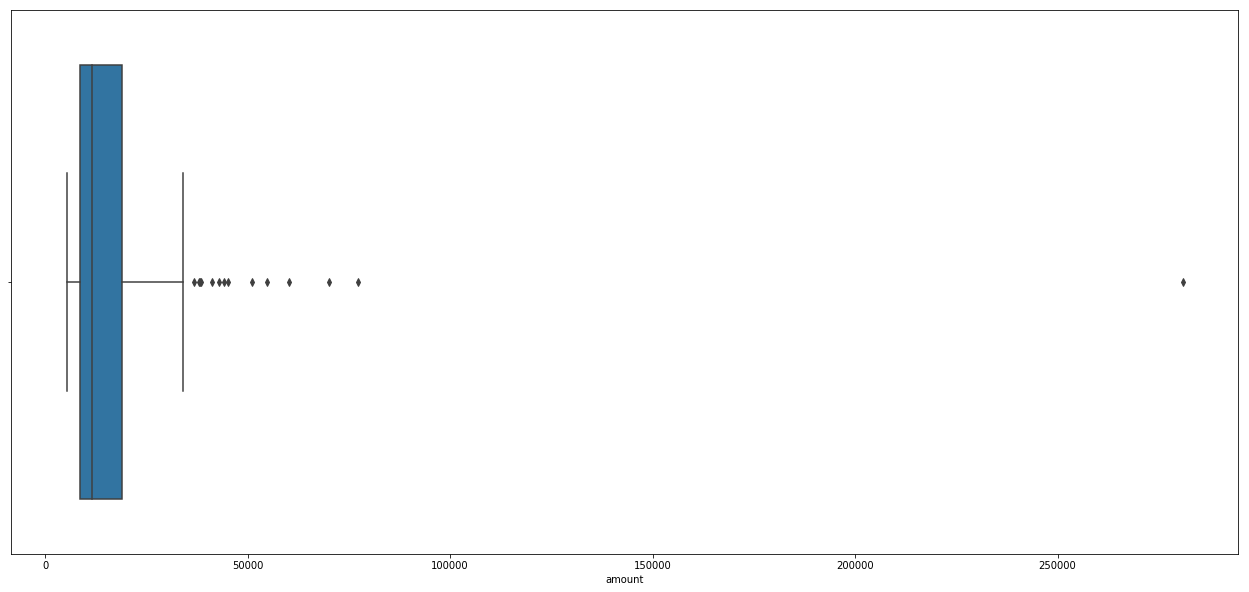

In [78]:
sns.boxplot(data2[data2['expense_category']=='Hotel Booking Expense'][data2['designation']=='Director'][data2['amount']>5000][data2['city']=='Mumbai']['amount'])

In [79]:
df=data2[data2['report_status'].isnull()==False].copy()
df.drop(['policy_voilations','txn_date', 'last_date_of_submission','report_submission_date', 'policy_id_1', 
         'policy_id_2', 'policy_id_3', 'policy_id_4', 'city',],axis=1,inplace=True)

In [80]:
import scipy
from scipy.stats.stats import pearsonr

In [81]:
df.columns

Index(['user_id', 'expense_category', 'amount', 'designation', 'travel_class',
       'txn_type', 'report_status', 'city_group', 'country',
       'category_pol_freq', 'cat_user_mean_amount', 'Cat_user_Deviation',
       'freq_veri_poli', 'freq_pol_voil', 'txn_veri_freq'],
      dtype='object')

In [82]:
df.corr()

,amount,category_pol_freq,cat_user_mean_amount,Cat_user_Deviation,freq_veri_poli,freq_pol_voil,txn_veri_freq
amount,1.000000,0.161577,0.746089,0.666785,0.015278,-0.001451,-0.002570
category_pol_freq,0.161577,1.000000,0.215194,0.001807,0.073712,-0.031303,-0.066127
cat_user_mean_amount,0.746089,0.215194,1.000000,0.001259,0.029673,-0.003237,0.002408
Cat_user_Deviation,0.666785,0.001807,0.001259,1.000000,-0.010267,0.001443,-0.006555
freq_veri_poli,0.015278,0.073712,0.029673,-0.010267,1.000000,-0.297082,0.115059
freq_pol_voil,-0.001451,-0.031303,-0.003237,0.001443,-0.297082,1.000000,-0.213115
txn_veri_freq,-0.002570,-0.066127,0.002408,-0.006555,0.115059,-0.213115,1.000000


In [83]:
df.drop(['user_id','cat_user_mean_amount'],axis=1,inplace=True)

In [84]:
df.columns

Index(['expense_category', 'amount', 'designation', 'travel_class', 'txn_type',
       'report_status', 'city_group', 'country', 'category_pol_freq',
       'Cat_user_Deviation', 'freq_veri_poli', 'freq_pol_voil',
       'txn_veri_freq'],
      dtype='object')

In [874]:
air=df[df['expense_category']!='Hotel Booking Expense'].drop(['expense_category'],axis=1)
hotel=df[df['expense_category']=='Hotel Booking Expense'].drop(['expense_category','travel_class'],axis=1)

# Model Building on Hotel Expenses

### Outliers

In [875]:
#hotel.drop(['country_code'],axis=True,inplace = True)

In [876]:
hotel=hotel[hotel.amount>850][hotel.amount<200000]

In [877]:
hotel[['country','amount','city_group']].pivot_table(['amount','city_group'],
                                                         ['country'],aggfunc={'amount':'mean','city_group': len}).sort_values('amount')

,amount,city_group
country,,
Zambia,6201.725000,2
Mozambique,6521.000000,1
Bhutan,10004.041379,29
India,12471.027037,7263
Mexico,17159.986667,3
Malaysia,17539.060000,7
Luxembourg,18462.500000,1
Ireland,21364.195000,2
Bangladesh,21811.874809,131


In [878]:
#hotel[['country','amount','city_group']].pivot_table(['amount','city_group'],
#                                                         ['country'],aggfunc={'amount':'mean','city_group': len}).sort_values('amount').to_csv('hotel_country_mean_amount.csv')

In [879]:
hotel_country_code=pd.read_csv('hotel_country_mean_amount.csv')
hotel=pd.merge(hotel, hotel_country_code[['country_code','country']], on=['country'])

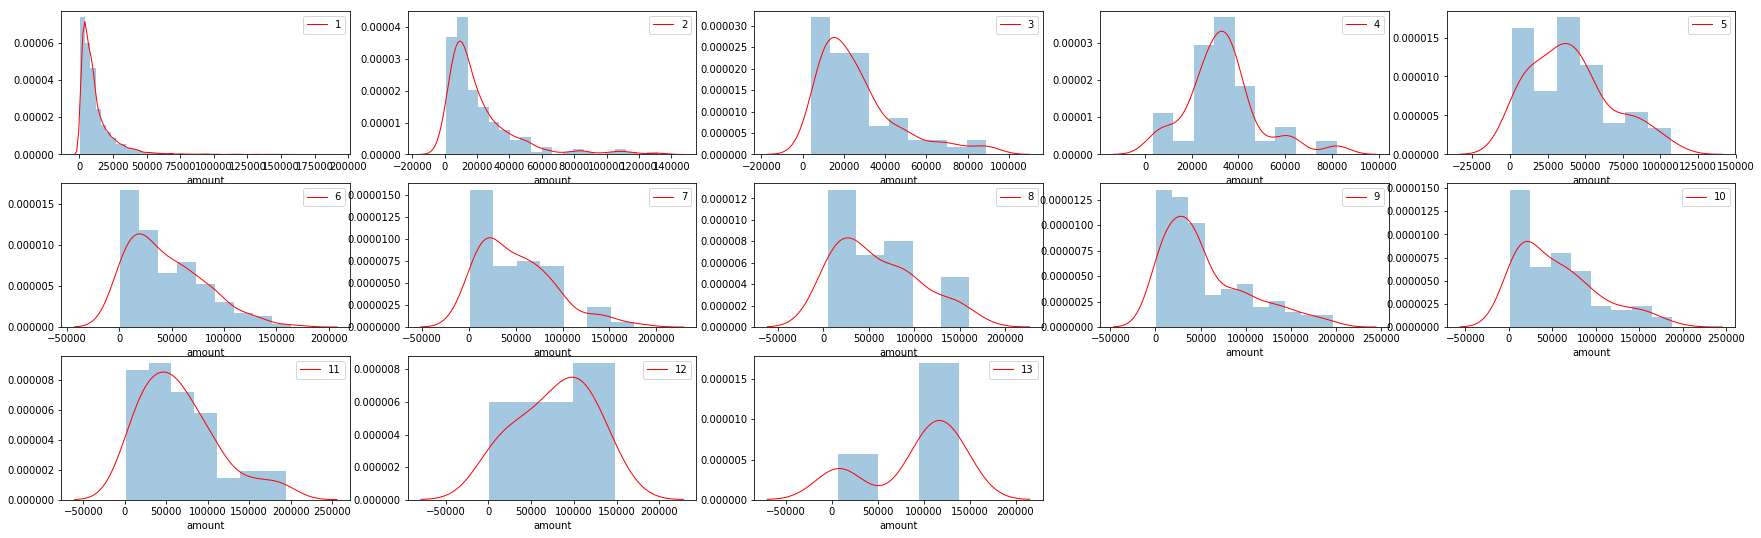

In [880]:
rcParams['figure.figsize']=30,9
for i in (range(1, 14)):
 plt.subplot(3,5,i)
 sns.distplot(hotel[hotel['country_code']==i]['amount'],kde_kws={"color": "r", "lw": 1, "label": i})


In [881]:
hotel.shape

(8470, 12)

In [882]:
limit=[55000,70000,80000,85000,110000,150000,160000,200000,200000,200000,200000,200000,280000]
for i in range(0,13):
     hotel.drop(hotel[hotel.country_code==i+1][hotel.amount>limit[i]].index,axis=0,inplace=True)

In [883]:
country_designation_mean=hotel[['country_code','designation','amount']].groupby(['country_code','designation']).mean()
country_designation_mean.columns=['country_designation_mean']
country_designation_mean.head()

country_designation_mean
country_code designation                                 
1            Administrative                  12657.053333
             Associate                       12044.866756
             Director                        11100.715345
             Executive Director              13508.952573
             Intern/Trainee                   8845.059906

In [884]:
country_mean=hotel[['country_code','amount']].groupby(['country_code']).mean()
country_mean.columns=['country_mean']
country_mean.head()

,country_mean
country_code,
1,11294.680761
2,17883.462781
3,24678.516066
4,33287.632581
5,40464.326429


In [885]:
hotel=pd.merge(hotel, country_designation_mean,'left', on=['country_code','designation'])
hotel=pd.merge(hotel, country_mean,'left', on=['country_code'])

In [886]:
hotel['CDM_dev']=hotel['amount']-hotel['country_designation_mean']
hotel['CM_dev']=hotel['amount']-hotel['country_mean']

In [887]:
#hotel=hotel.sort_values('country_designation_mean')
#hotel.reset_index(inplace=True)

In [888]:
#f=0
#l=0
#while(l<hotel.shape[0]):
#    if(hotel.loc[f,'country_designation_mean']!=hotel.loc[l,'country_designation_mean']):
 #       temp_matrix=temp.values.reshape(-1,1)
  #      scaled=preprocessing.MinMaxScaler()
  #      scaled_temp=scaled.fit_transform(temp_matrix)
  #      hotel['CDM_dev'][hotel.country_designation_mean==hotel.loc[f,'country_designation_mean']]=scaled_temp
  #      f=l
  #  l+=1           

In [889]:
hotel.drop(['country_designation_mean','country_mean','country'],axis=1,inplace=True)

In [890]:
hotel.corr()

,amount,category_pol_freq,Cat_user_Deviation,freq_veri_poli,freq_pol_voil,txn_veri_freq,country_code,CDM_dev,CM_dev
amount,1.000000e+00,-1.980341e-14,5.682424e-01,9.928780e-03,4.276519e-02,3.219086e-02,6.141108e-01,7.455854e-01,7.861036e-01
category_pol_freq,-1.980341e-14,1.000000e+00,2.729764e-15,-2.267223e-12,-3.797984e-15,-4.813294e-13,3.648986e-14,-1.096901e-15,-4.192763e-15
Cat_user_Deviation,5.682424e-01,2.729764e-15,1.000000e+00,-1.191648e-02,-6.745660e-03,1.937051e-02,1.754046e-01,6.012252e-01,5.828071e-01
freq_veri_poli,9.928780e-03,-2.267223e-12,-1.191648e-02,1.000000e+00,-1.124700e-01,7.348486e-02,5.191908e-02,-3.554024e-02,-2.961147e-02
freq_pol_voil,4.276519e-02,-3.797984e-15,-6.745660e-03,-1.124700e-01,1.000000e+00,-1.852760e-01,-8.532421e-02,1.289016e-01,1.236329e-01
txn_veri_freq,3.219086e-02,-4.813294e-13,1.937051e-02,7.348486e-02,-1.852760e-01,1.000000e+00,7.877022e-02,-4.226573e-02,-2.193870e-02
country_code,6.141108e-01,3.648986e-14,1.754046e-01,5.191908e-02,-8.532421e-02,7.877022e-02,1.000000e+00,6.777107e-18,3.812540e-16
CDM_dev,7.455854e-01,-1.096901e-15,6.012252e-01,-3.554024e-02,1.289016e-01,-4.226573e-02,6.777107e-18,1.000000e+00,9.484568e-01
CM_dev,7.861036e-01,-4.192763e-15,5.828071e-01,-2.961147e-02,1.236329e-01,-2.193870e-02,3.812540e-16,9.484568e-01,1.000000e+00


In [891]:
designation=np.sort(hotel['designation'].unique())
designation

array(['Administrative', 'Associate', 'Director', 'Executive Director',
       'Intern/Trainee', 'Manager', 'Managing Director', 'Partner',
       'Senior Associate', 'Senior Manager', 'Specialist'], dtype=object)

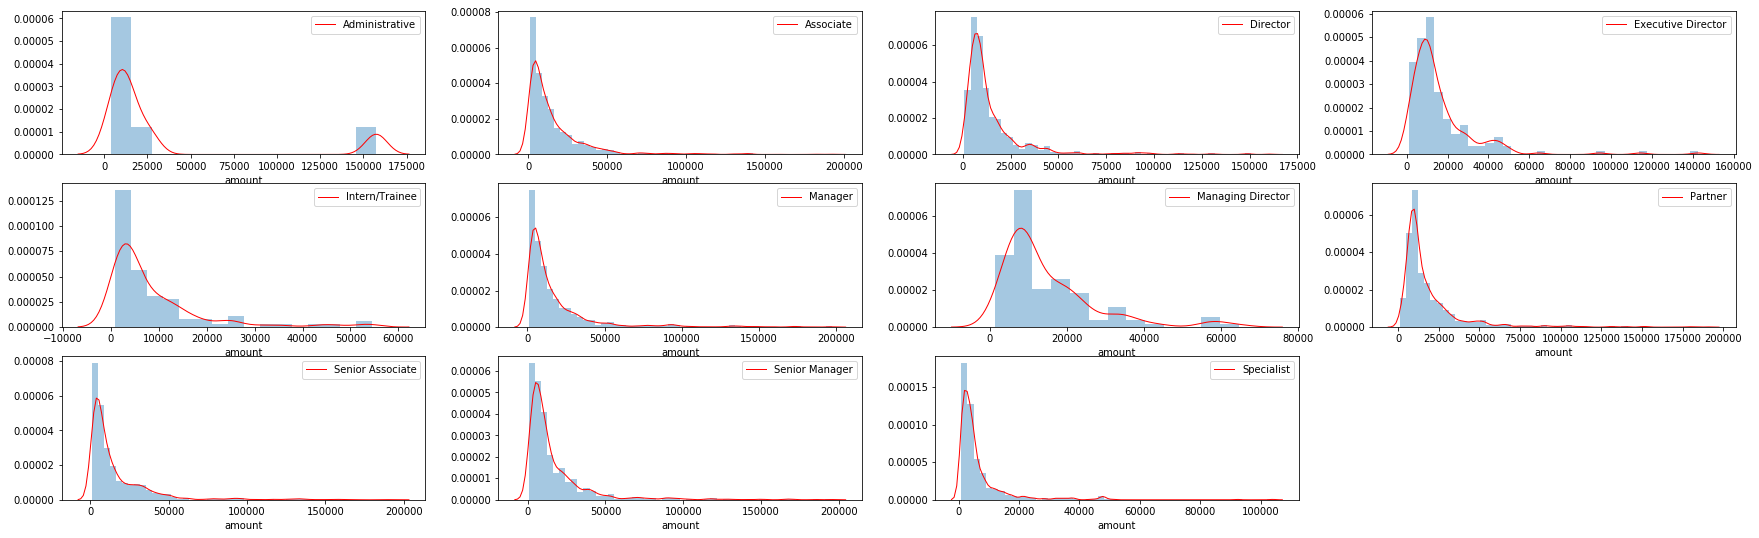

In [892]:

rcParams['figure.figsize']=30,9
for i in (range(0, 11)):
 plt.subplot(3,4,i+1)
 sns.distplot(hotel[hotel['designation']==designation[i]]['amount'],kde_kws={"color": "r", "lw": 1, "label": designation[i]})


In [893]:
data2.report_status.unique()

array(['Data Enrichment', 'Verified by Finance', 'Pending for Audit',
       'In-Queue', 'Return to update', nan, 'Saved', 'Rejected',
       'Pending for Approval', 'Partially Verified'], dtype=object)

In [894]:
hotel=pd.get_dummies(hotel, columns = ['txn_type','city_group'],drop_first = True)
hotel=hotel[hotel['report_status'].isin(['Verified by Finance','Rejected',])]

In [895]:
hotel.report_status.value_counts()

Verified by Finance    7184
Rejected                 85
Name: report_status, dtype: int64

In [896]:
#hotel['report_status'][hotel.report_status=='Saved']='Rejected'

In [897]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
hotel['report_status']=enc.fit_transform(hotel['report_status'])
hotel.head()

,amount,designation,report_status,category_pol_freq,Cat_user_Deviation,freq_veri_poli,freq_pol_voil,txn_veri_freq,country_code,CDM_dev,CM_dev,txn_type_HDFC Expense Cr,txn_type_HDFC Expense Dr,txn_type_Personal Card,city_group_Non-Metro
0,7316.00,Partner,1,0.131456,-786.558,0.84484,0.0,0.893998,1,-6187.348318,-3978.680761,0,1,0,0
1,9952.43,Partner,1,0.131456,1849.872,0.84484,0.0,0.893998,1,-3550.918318,-1342.250761,0,1,0,0
2,4425.00,Partner,1,0.131456,-3677.558,0.84484,0.0,0.893998,1,-9078.348318,-6869.680761,0,1,0,0
3,4425.00,Partner,1,0.131456,-3677.558,0.84484,0.0,0.893998,1,-9078.348318,-6869.680761,0,1,0,0
4,7997.46,Partner,1,0.131456,-105.098,0.84484,0.0,0.893998,1,-5505.888318,-3297.220761,0,1,0,0


# Multiple Model 

In [898]:
y=hotel['report_status']
x=hotel.drop(['report_status','designation'],axis=1)

In [899]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#x_train,x_test,y_train,y_test=train_test_split(x, y,test_size = 0.3, random_state = 30,stratify=y)

train_data,test_data=train_test_split(hotel,test_size = 0.3, random_state = 30,stratify=y)

In [945]:
train_data['report_status'].value_counts()

1    5029
0     118
Name: report_status, dtype: int64

In [946]:
train_data=pd.concat([train_data,train_data[train_data.report_status==0]],axis=0)
test_data=pd.concat([test_data,test_data[test_data.report_status==0]],axis=0)

#dict = {
    'Verified by Finance': 0,
    'Partially Verified': .15,
    'Pending for Approval':.5,
    'In-Queue': .5,
    'Pending for Audit':.6,
    'Return to update' :.75,
    'Data Enrichment':.85,
    'Saved':1, 
    'Rejected':1 
}
x['f%'] = x['report_status'].map(dict)
y=x['f%']
x=x.drop(['report_status','enc'],axis=1)

In [947]:
hotel.columns

Index(['amount', 'designation', 'report_status', 'category_pol_freq',
       'Cat_user_Deviation', 'freq_veri_poli', 'freq_pol_voil',
       'txn_veri_freq', 'country_code', 'CDM_dev', 'CM_dev',
       'txn_type_HDFC Expense Cr', 'txn_type_HDFC Expense Dr',
       'txn_type_Personal Card', 'city_group_Non-Metro'],
      dtype='object')

In [970]:
model_rfc=RandomForestClassifier(n_estimators=200,max_depth=5)
import tqdm
from tqdm import tqdm_notebook
model_list = []
scores_list = []
for i in tqdm_notebook(range(0, 11)):
  data = train_data[train_data['designation']==designation[i]]
  predictors = ['CDM_dev', 'freq_pol_voil', 'freq_veri_poli','txn_veri_freq','city_group_Non-Metro']
  target = ['report_status']
  X_train = data[predictors]
  y_train = data[target]
  scores_rfc = cross_val_score(estimator=model_rfc, X=X_train, y=y_train, cv=3)
  scores_list.append(scores_rfc.mean())
  model_rfc=RandomForestClassifier(n_estimators=200,max_depth=5)
  model_rfc.fit(X_train, y_train)
  model_list.append(model_rfc)

In [971]:
np.array(scores_list).mean()

0.9842847188300626

In [972]:
train_data['report_status_pred']=train_data['report_status']
for i in (range(0, 11)):
    train_data['report_status_pred'][train_data['designation']==designation[i]] = model_list[i].predict(train_data[train_data['designation']==designation[i]][predictors])

In [973]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_data['report_status'],train_data['report_status_pred'])

array([[ 128,  108],
       [   6, 5023]], dtype=int64)

In [974]:
from sklearn.metrics import classification_report

print(classification_report(train_data['report_status'],train_data['report_status_pred']))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69       236
           1       0.98      1.00      0.99      5029

   micro avg       0.98      0.98      0.98      5265
   macro avg       0.97      0.77      0.84      5265
weighted avg       0.98      0.98      0.98      5265



In [975]:
designation_test=np.sort(test_data['designation'].unique())
designation_test

array(['Administrative', 'Associate', 'Director', 'Executive Director',
       'Intern/Trainee', 'Manager', 'Managing Director', 'Partner',
       'Senior Associate', 'Senior Manager', 'Specialist'], dtype=object)

In [976]:
test_data['report_status_pred']=test_data['report_status']
for i in (range(0, 11)):
    if(test_data[test_data['designation']==designation[i]].shape[0]!=0):
        test_data['report_status_pred'][test_data['designation']==designation[i]] = model_list[i].predict(test_data[test_data['designation']==designation[i]][predictors])

In [977]:
confusion_matrix(test_data['report_status'],test_data['report_status_pred'])

array([[  40,   64],
       [   3, 2152]], dtype=int64)

In [978]:
print(classification_report(test_data['report_status'],test_data['report_status_pred']))

              precision    recall  f1-score   support

           0       0.93      0.38      0.54       104
           1       0.97      1.00      0.98      2155

   micro avg       0.97      0.97      0.97      2259
   macro avg       0.95      0.69      0.76      2259
weighted avg       0.97      0.97      0.96      2259



In [979]:
feature_imp = pd.Series(model_list[1].feature_importances_,index=predictors).sort_values(ascending=False)
feature_imp

CDM_dev                 0.546644
freq_pol_voil           0.208966
txn_veri_freq           0.100910
freq_veri_poli          0.084387
city_group_Non-Metro    0.059094
dtype: float64

# Single model

In [1021]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size = 0.3, random_state = 30,stratify=y)

In [1022]:
model = RandomForestClassifier(n_estimators=200,max_depth=10)
model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1023]:
model.score(xtest,ytest)

0.9917469050894085

In [1024]:
confusion_matrix(ytrain,model.predict(xtrain))

array([[  21,   38],
       [   0, 5029]], dtype=int64)

In [1025]:
confusion_matrix(ytest,model.predict(xtest))

array([[   8,   18],
       [   0, 2155]], dtype=int64)

In [1026]:
print(classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47        26
           1       0.99      1.00      1.00      2155

   micro avg       0.99      0.99      0.99      2181
   macro avg       1.00      0.65      0.73      2181
weighted avg       0.99      0.99      0.99      2181



In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_